In [129]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [130]:
butcher_table = np.array([
                        [0.5, 0.5, 0],
                        [1.5, -0.5, 2],
                        [0, -0.5, 1.5]])
y0 = np.array([1, 0, 0])
t = 0.03

In [131]:
def system(y):
    k1 = 0.04
    k2 = 3e7
    k3 = 1e4
    return np.array([[-k1 * y[0] + k3 * y[1] * y[2]],
                     [k1 * y[0] - k3 * y[1] * y[2] - k2 * (y[1]**2)],
                     [k2 * (y[1]**2)]])

In [132]:
def system_for_k1(x, y, h, a11):
    k1 = 0.04
    k2 = 3e7
    k3 = 1e4
    return -k1 * (y[0] + a11 * h * x[0]) + k3 * (y[1] + a11 * h * x[1]) * (y[2] + a11 * h * x[2]) - x[0], \
           k1 * (y[0] + a11 * h * x[0]) - k3 * (y[1] + a11 * h * x[1]) * (y[2] + a11 * h * x[2]) - k2 * ((y[1] + a11 * h * x[1])**2) - x[1], \
           k2 * ((y[1] + a11 * h * x[1])**2) - x[2]

def system_for_k2(x, y, h, a21, a22, k):
    k1 = 0.04
    k2 = 3e7
    k3 = 1e4
    return -k1 * (y[0] + h * (a21 * k[0] + a22 * x[0])) + k3 * (y[1] + h * (a21 * k[1] + a22 * x[1])) * \
                         (y[2] + h * (a21 * k[2] + a22 * x[2])) - x[0], \
        k1 * (y[0] + h * (a21 * k[0] + a22 * x[0])) - k3 * (y[1] + h * (a21 * k[1] + a22 * x[1])) * (y[2] + h * (a21 * k[2] + a22 * x[2]))\
                         - k2 * ((y[1] + h * (a21 * k[1] + a22 * x[1]))**2) - x[1], \
        k2 * ((y[1] + h * (a21 * k[1] + a22 * x[1]))**2) - x[2]

In [133]:
def Runge_Kutta(system, butcher_table, t, h, init_vector):
    N = t / h
    c1 = butcher_table[0, 0]
    c2 = butcher_table[1, 0]
    b1 = butcher_table[2, 1]
    b2 = butcher_table[2, 2]
    a11 = butcher_table[0, 1]
    a12 = butcher_table[0, 2]
    a21 = butcher_table[1, 1]
    a22 = butcher_table[1, 2]
    yn = np.array(init_vector)
    y1_change = [1]
    y2_change = [0]
    y3_change = [0]
    for i in range(int(N)):
        k1 = fsolve(system_for_k1, [0, 0, 0], args=(yn, h, a11))
        k2 = fsolve(system_for_k2, [0, 0, 0], args=(yn, h, a21, a22, k1))
        yn = yn + h * (b1 * k1 + b2 * k2)
        y1_change.append(yn[0])
        y2_change.append(yn[1])
        y3_change.append(yn[2])
    return yn, y1_change, y2_change, y3_change

In [134]:
solution, y1, y2, y3 = Runge_Kutta(system, butcher_table, t = 0.03, h = 0.0004, init_vector = y0)
solution2, y1_2, y2_2, y3_2 = Runge_Kutta(system, butcher_table, t = 600, h = 2, init_vector = y0)
t = np.linspace(0, 0.03, 76)
t2 = np.linspace(0, 600, 301)

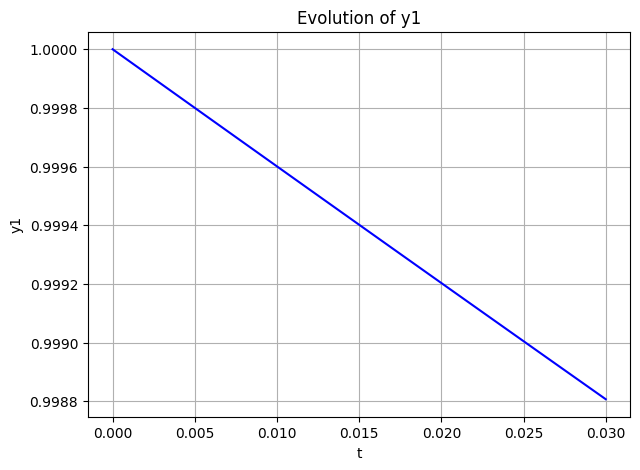

In [135]:
plt.figure(figsize=(7, 5))
plt.plot(t, y1, c='blue')
plt.xlabel("t")
plt.ylabel("y1")
plt.title("Evolution of y1")
plt.grid()
plt.show()

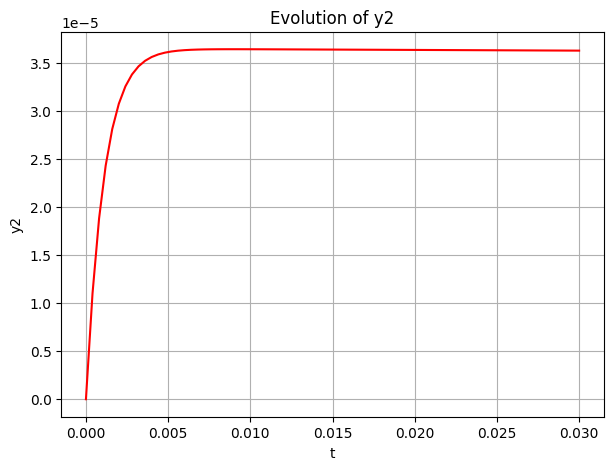

In [136]:
plt.figure(figsize=(7, 5))
plt.plot(t, y2, c='red')
plt.xlabel("t")
plt.ylabel("y2")
plt.title("Evolution of y2")
plt.grid()
plt.show()

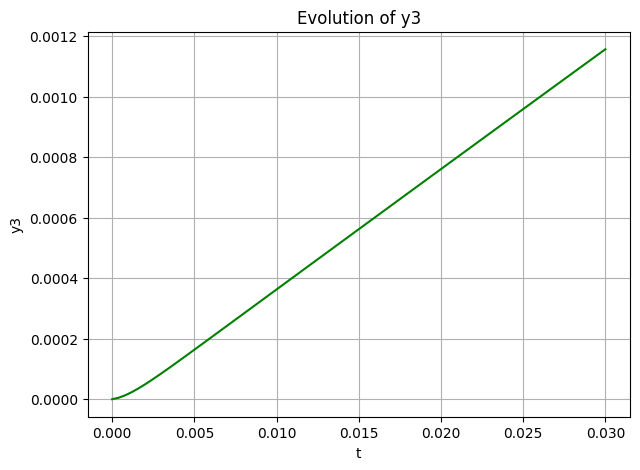

In [137]:
plt.figure(figsize=(7, 5))
plt.plot(t, y3, c='green')
plt.xlabel("t")
plt.ylabel("y3")
plt.title("Evolution of y3")
plt.grid()
plt.show()

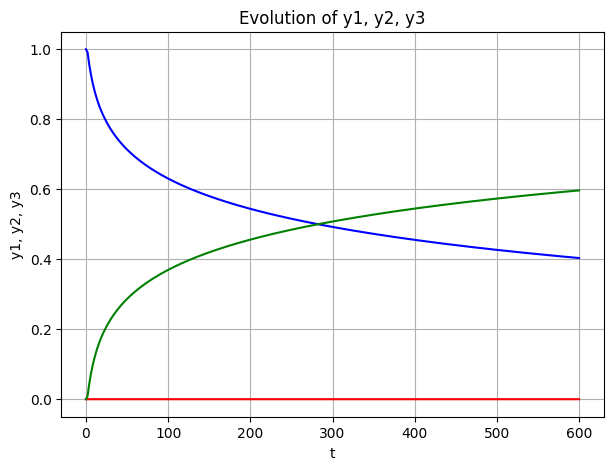

In [138]:
plt.figure(figsize=(7, 5))
plt.plot(t2, y1_2, c='blue')
plt.plot(t2, y2_2, c='red')
plt.plot(t2, y3_2, c='green')
plt.xlabel("t")
plt.ylabel("y1, y2, y3")
plt.title("Evolution of y1, y2, y3")
plt.grid()
plt.show()